In [124]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [125]:
PATH = "Week 30 - United States Marriage Status 2005 to 2017.csv"
COLUMNS_FOR_FACTORISATION = ["Gender", "Year", "Age Group"]

In [126]:
dataset = pd.read_csv(PATH)
factorization_table = {}

dataset.drop(
    [
        "index",
        "Estimated Population",
        "Metric"
    ],
    axis=1,
    inplace=True,
)

In [127]:
for column in dataset.columns:
    if column in COLUMNS_FOR_FACTORISATION:
        dataset[column], table = pd.factorize(dataset[column])
        factorization_table[column] = pd.DataFrame(
            columns=[column],
            data=table
        )

dataset

,Year,Gender,Age Group,Estimated Percent
0,0,0,0,1.000
1,0,0,1,1.000
2,0,0,2,1.000
3,0,0,3,1.000
4,0,0,4,1.000
...,...,...,...,...
931,12,1,1,0.597
932,12,1,2,0.201
933,12,1,3,0.131
934,12,1,4,0.093


<Axes: >

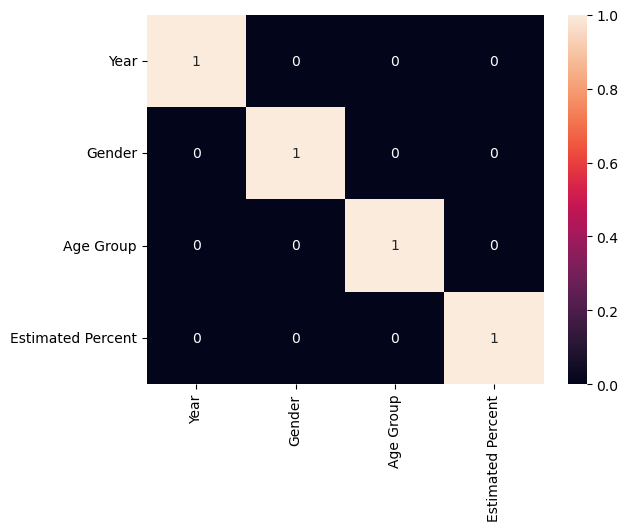

In [128]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True
)

In [129]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop("Age Group", axis=1),
    dataset["Age Group"],
    test_size=0.2
)

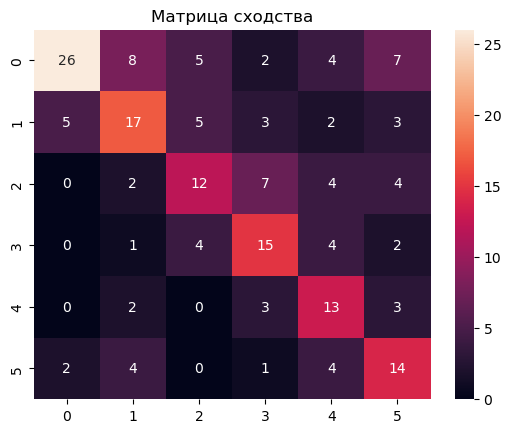

In [130]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(
    confusion_matrix,
    annot=True
)
plt.title('Матрица сходства')

plt.savefig("Рис 9.jpg")

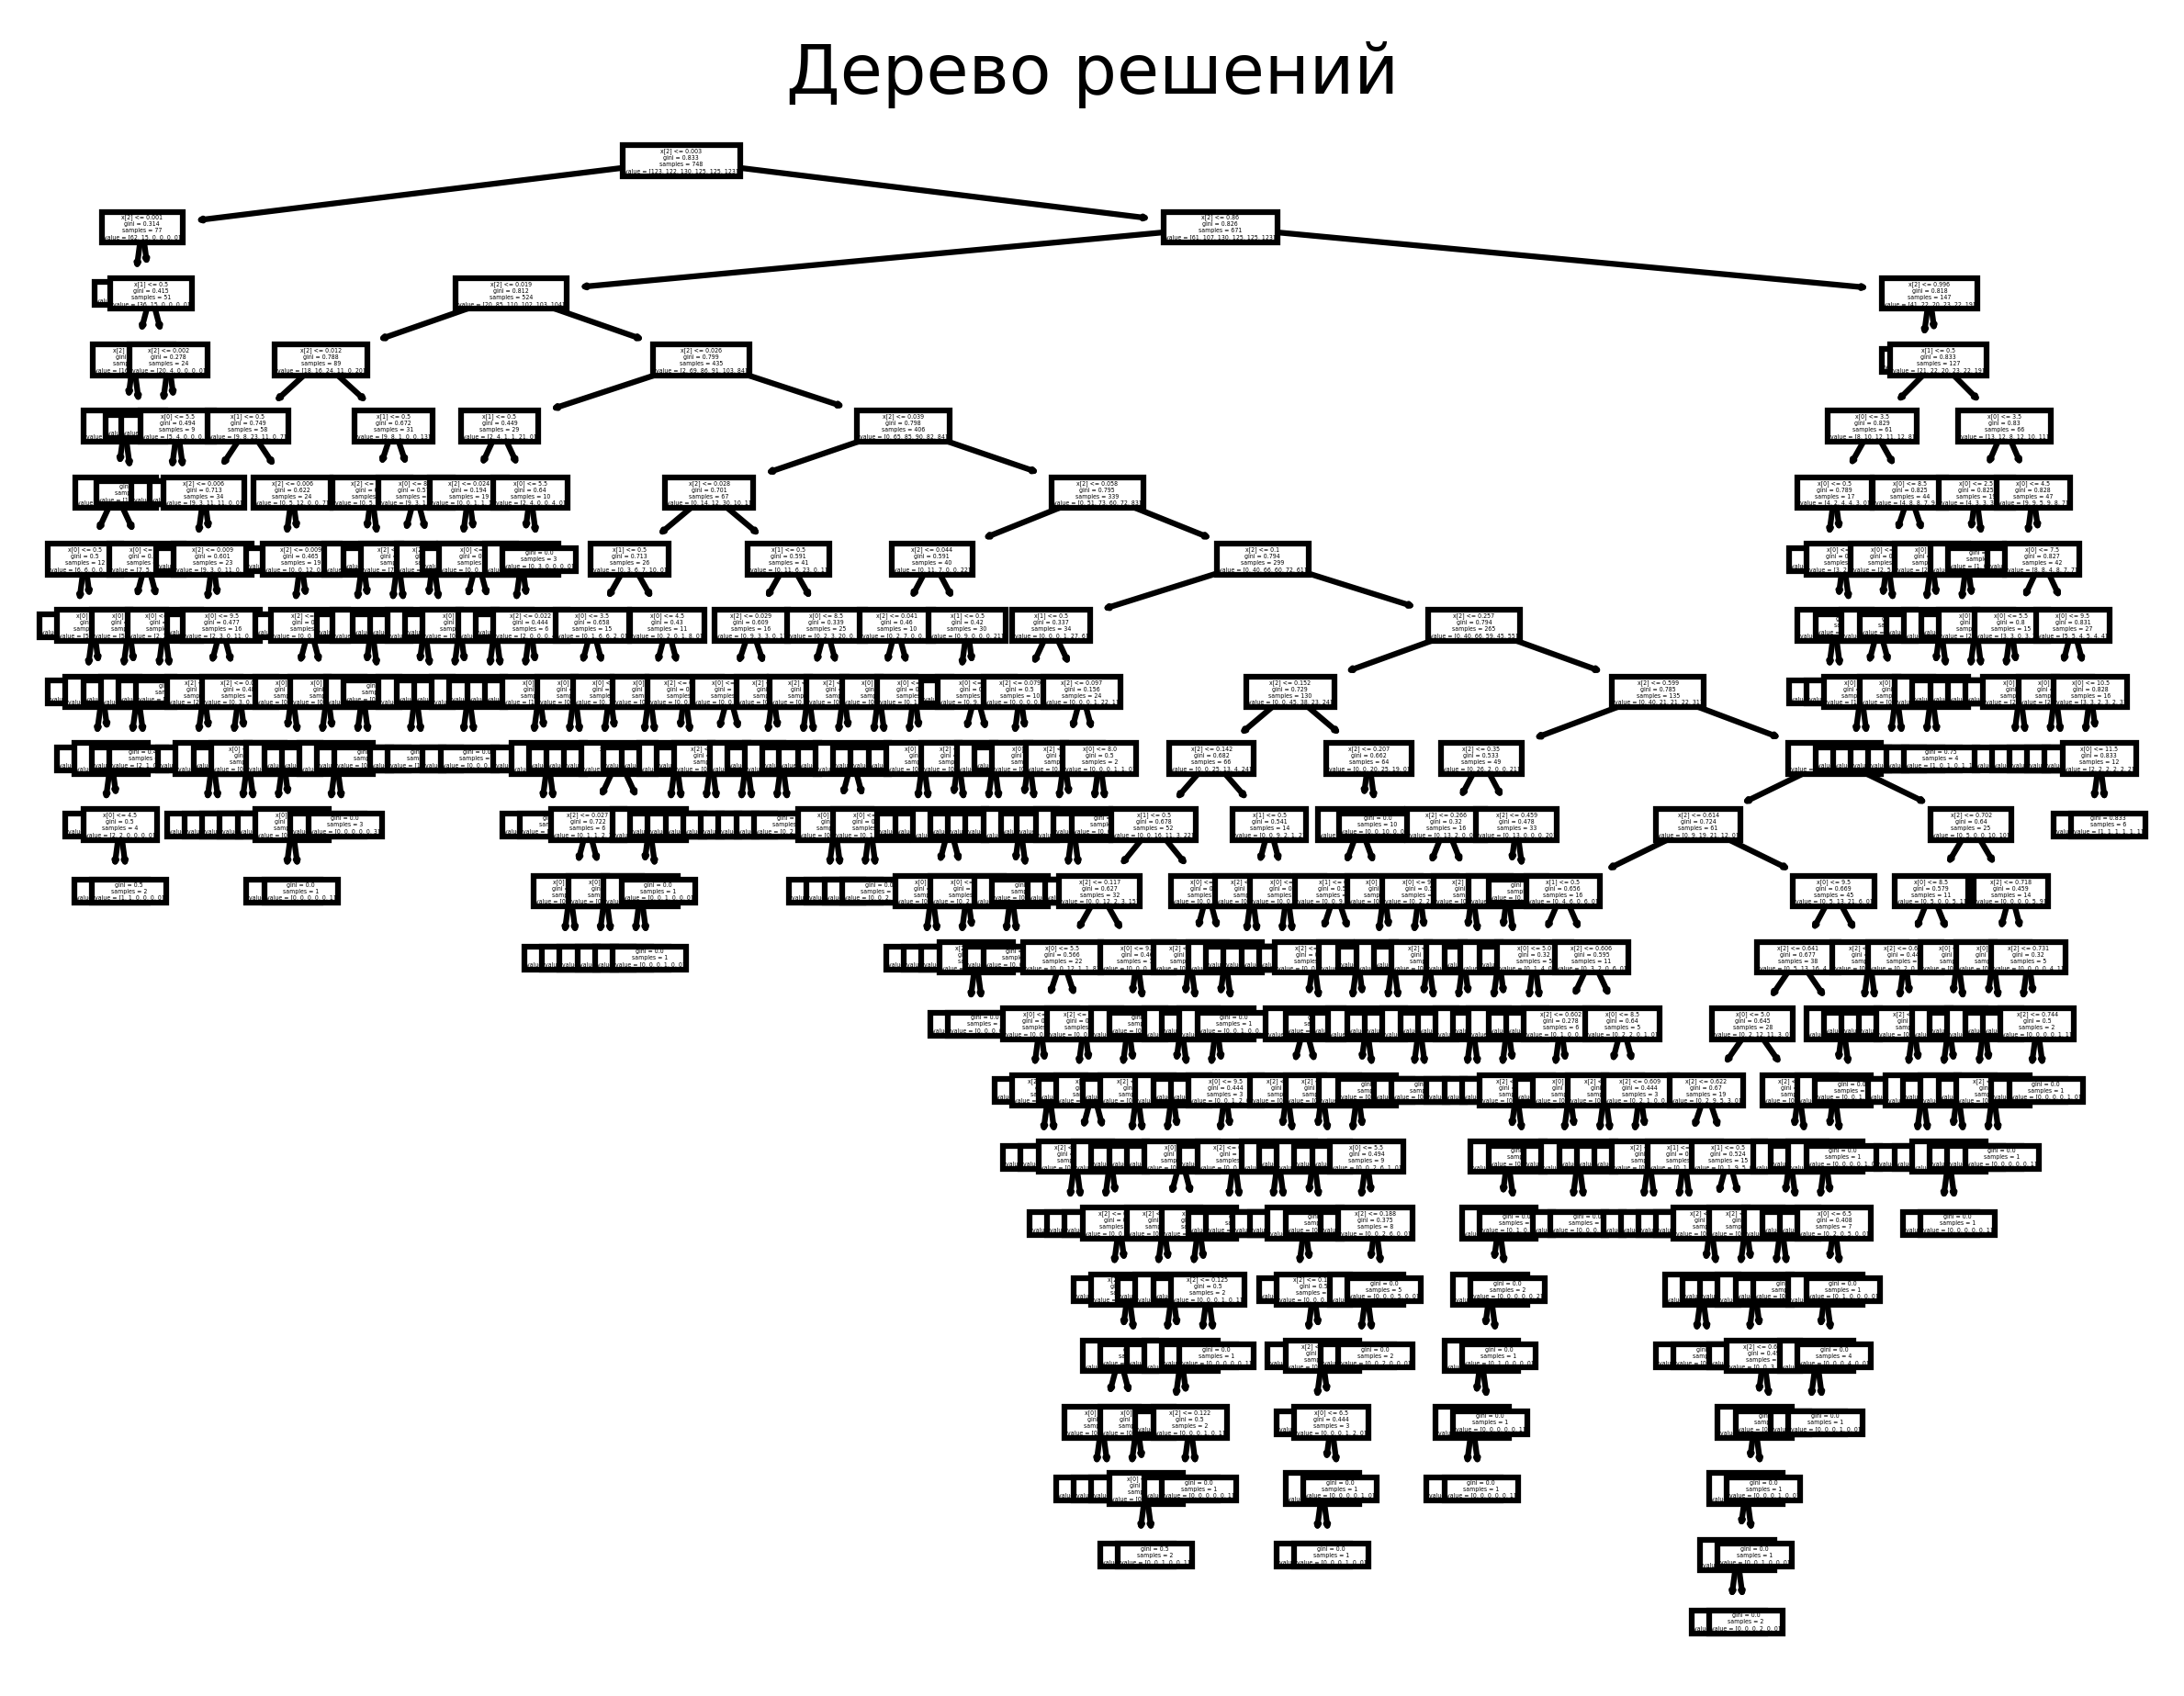

In [131]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")
plt.savefig("Рис 10.jpg")